In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
from docx import Document
from docx.shared import Inches
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.shared import Cm
from docx.enum.table import WD_TABLE_DIRECTION
from docx.enum.table import WD_ROW_HEIGHT_RULE

In [2]:
variables = ['iso_code','location','date','total_vaccinations','total_vaccinations_per_hundred']
b_vacuna = pd.read_csv('https://covid.ourworldindata.org/data/vaccinations/vaccinations.csv', usecols=variables)
b_vacuna['date'] = pd.to_datetime(b_vacuna['date'])
b_vacuna

,location,iso_code,date,total_vaccinations,total_vaccinations_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.00
1,Afghanistan,AFG,2021-02-23,NaN,NaN
2,Afghanistan,AFG,2021-02-24,NaN,NaN
3,Afghanistan,AFG,2021-02-25,NaN,NaN
4,Afghanistan,AFG,2021-02-26,NaN,NaN
...,...,...,...,...,...
17308,Zimbabwe,ZWE,2021-05-05,576233.0,3.88
17309,Zimbabwe,ZWE,2021-05-06,607355.0,4.09
17310,Zimbabwe,ZWE,2021-05-07,640762.0,4.31
17311,Zimbabwe,ZWE,2021-05-08,657838.0,4.43


### Última fecha en la base:

In [3]:
b_vacuna.date.max()

Timestamp('2021-05-10 00:00:00')

In [6]:
corte = datetime.datetime.today()-datetime.timedelta(days=8)
corte = corte.replace(hour=0, minute=0, second=0, microsecond=0)
#corte = corte - datetime.timedelta(days=1)
corte = corte + datetime.timedelta(days=1)

### Los datos de varios países no son diarios, por lo que faltan los datos de varias fechas

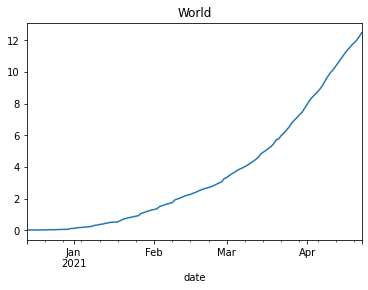

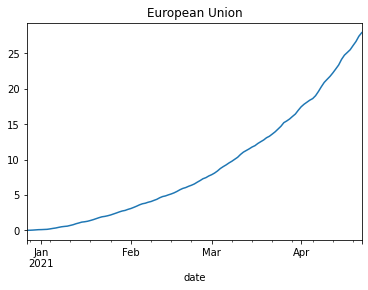

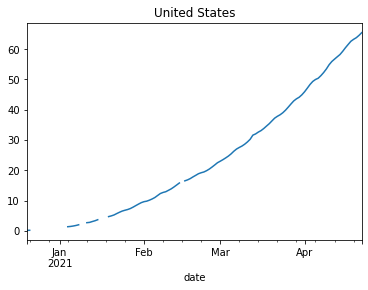

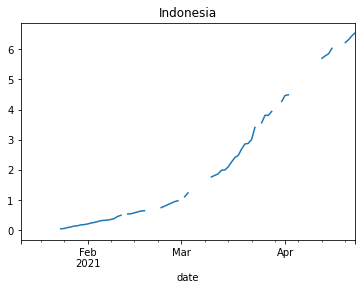

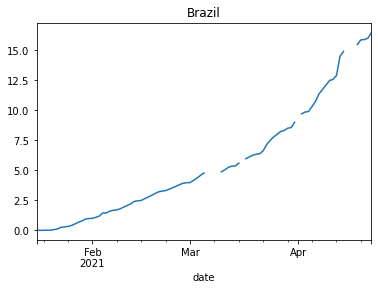

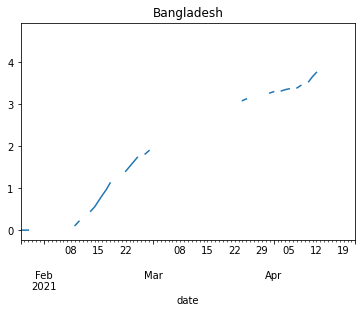

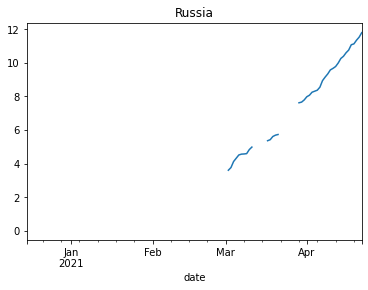

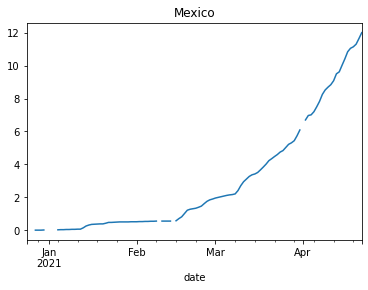

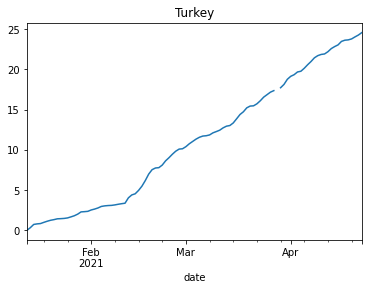

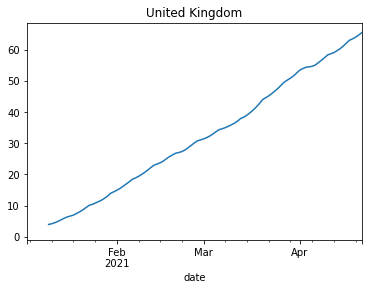

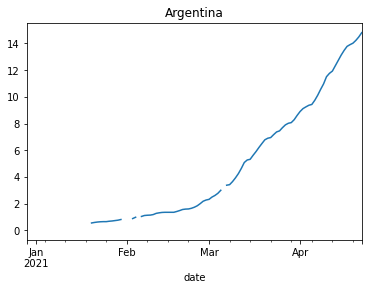

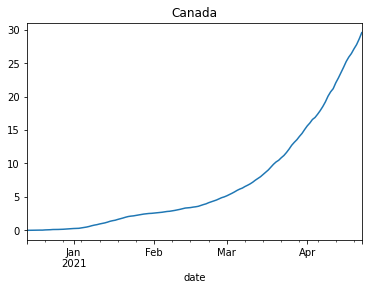

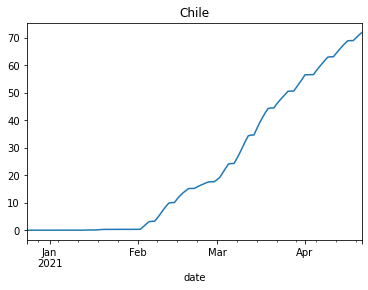

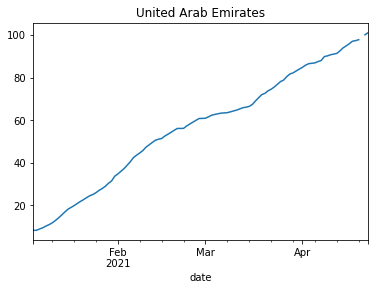

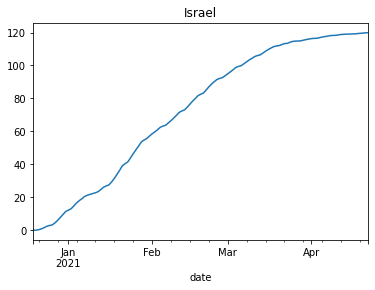

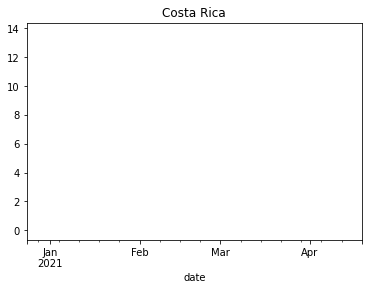

In [5]:
paises = ['World','European Union','United States','Indonesia','Brazil','Bangladesh','Russia','Mexico','Turkey',
          'United Kingdom','Argentina','Canada','Chile','United Arab Emirates','Israel','Costa Rica']
for pais in paises:
    b_vacuna[b_vacuna['location']==pais].set_index('date')['total_vaccinations_per_hundred'].plot()
    plt.title(pais)
    plt.show()

### Estimo los datos faltantes con una interpolación

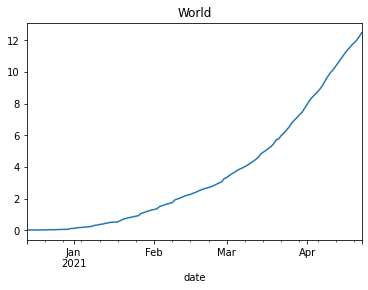

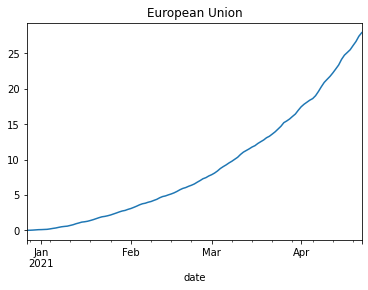

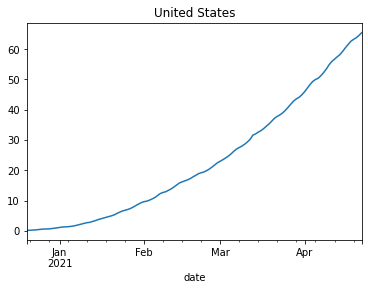

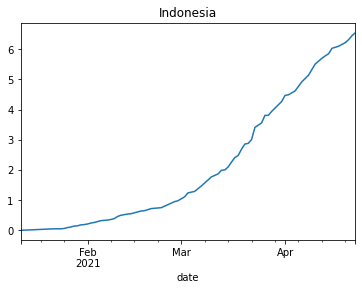

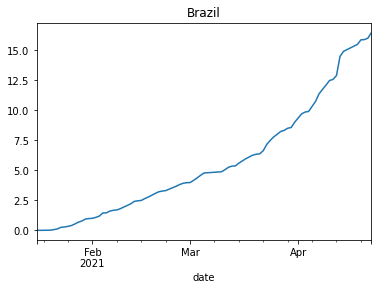

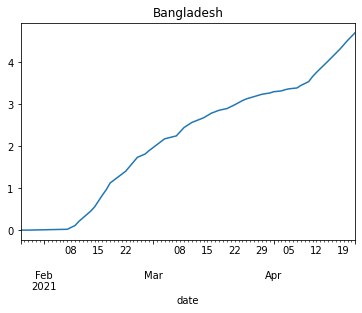

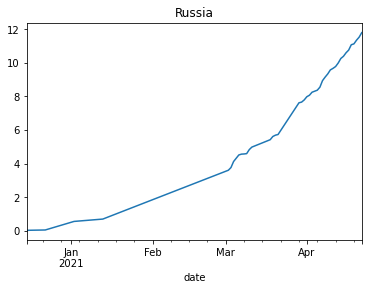

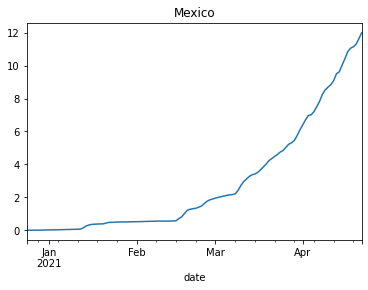

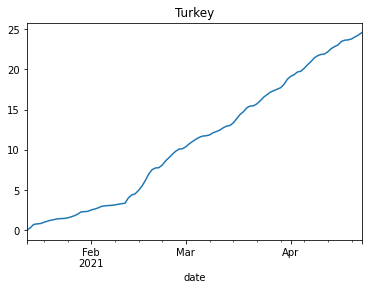

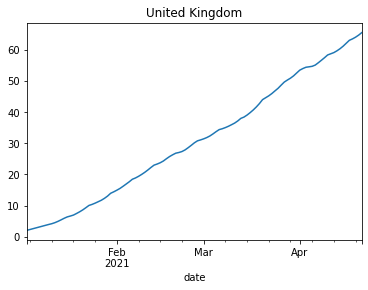

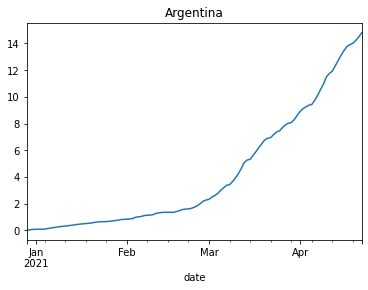

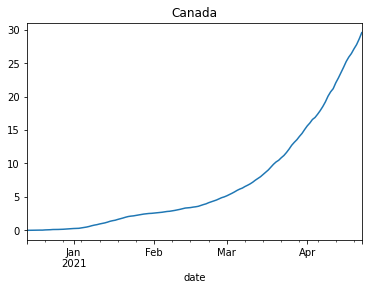

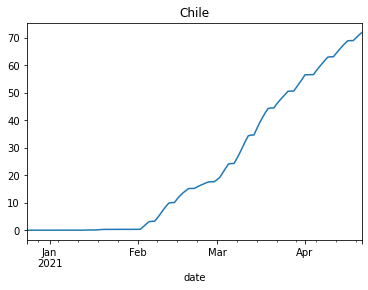

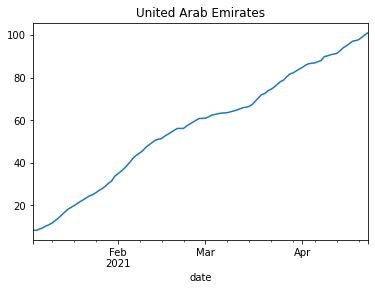

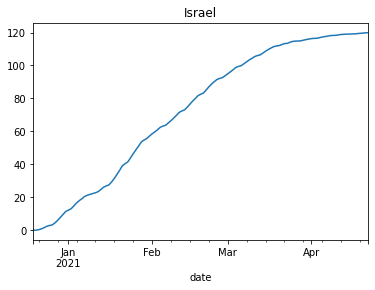

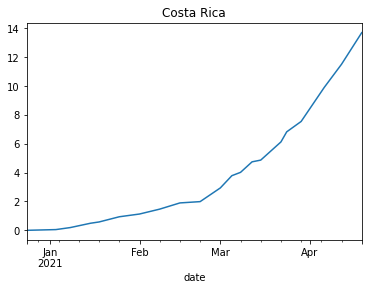

In [6]:
for pais in paises:
    b_vacuna[b_vacuna['location']==pais].set_index('date')['total_vaccinations_per_hundred'].interpolate().plot()
    plt.title(pais)
    plt.show()

In [10]:
paises = ['World','European Union','United States','Indonesia','Brazil','Russia','Mexico','Turkey',
          'United Kingdom','Argentina','Canada','Chile','United Arab Emirates','Israel','Costa Rica']
vacunas_100 = []
vacunas_antes = []
personas = []
personas_antes = []
last_date = []
for pais in paises:
    value = b_vacuna[b_vacuna['location']==pais].interpolate().iloc[-1,-1]
    try:
        value1 =  b_vacuna[b_vacuna['location']==pais].interpolate().set_index('date')['total_vaccinations_per_hundred'].loc[corte]
    except:
        value1 = value
    people = round(b_vacuna[b_vacuna['location']==pais].interpolate().iloc[-1,-2])
    try:
        people1 = round(b_vacuna[b_vacuna['location']==pais].interpolate().set_index('date')['total_vaccinations'].loc[corte])
    except:
        people1 = people
    last = str(b_vacuna[b_vacuna['location']==pais].dropna().iloc[-1,-3])[:10]
    last_date.append(last)
    personas.append(people)
    personas_antes.append(people1)
    vacunas_100.append(value)
    vacunas_antes.append(round(value1,2))


### Cuadro ordenado por personas vacunadas por cada 100 habs, utiliza los datos estimados por interpolación

In [11]:
base_100_interes = pd.DataFrame({'País/Región': paises,
                                 'Dosis aplicadas hace una semana (Total)': personas_antes,
                                 'Dosis aplicadas (Total)': personas,
                                 'Dosis aplicadas por cada 100 habs. hace una semana': vacunas_antes,
                                 'Dosis aplicadas por cada 100 habs.': vacunas_100,
                                 'Última fecha reportada': last_date
                                }).sort_values('Dosis aplicadas por cada 100 habs.', ascending=False)
base_100_interes = base_100_interes.set_index('País/Región').rename(index = {'United Arab Emirates': 'Emiratos Árabes Unidos',
                                                         'United Kingdom': 'Reino Unido',
                                                         'United States': 'Estados Unidos',
                                                         'Turkey': 'Turquía', 'European Union': 'Unión Europea',
                                                         'Canada':'Canadá', 'Brazil': 'Brasil', 'Russia': 'Rusia',
                                                         'World': 'Mundial', 'Mexico':'México'}).reset_index()
base_100_interes

,País/Región,Dosis aplicadas hace una semana (Total),Dosis aplicadas (Total),Dosis aplicadas por cada 100 habs. hace una semana,Dosis aplicadas por cada 100 habs.,Última fecha reportada
0,Israel,10476504,10508855,121.04,121.41,2021-05-10
1,Emiratos Árabes Unidos,10779163,11186348,108.99,113.10,2021-05-10
2,Chile,15204009,15705775,79.53,82.16,2021-05-09
3,Reino Unido,50682567,53328845,74.66,78.56,2021-05-09
4,Estados Unidos,247769049,261599381,74.08,78.22,2021-05-10
5,Canadá,14284234,16258155,37.85,43.08,2021-05-10
6,Unión Europea,157582578,174863647,35.42,39.30,2021-05-10
7,Turquía,23729113,25018078,28.14,29.66,2021-05-10
8,Brasil,45273825,47365348,21.30,22.28,2021-05-10
9,Argentina,8197011,9122759,18.14,20.18,2021-05-10


### Cuadro de ocupación hospitalaria en las últimas dos semanas

In [12]:
ocupacion2 = pd.read_excel('C:/Users/Emilio EG/Documents/ITAM/CIC19/datos/MIAS/BaseOcupacionHospitalaria_210507.xlsx', skiprows=4, index_col=0)
ocupacion2 = ocupacion2[ocupacion2.columns[-2:]]
fechas_date = list(ocupacion2.columns)
fechas_str = [str(x)[:10] for x in list(ocupacion2.columns)]
ocupacion2.rename(columns = {fechas_date[0]:fechas_str[0],fechas_date[1]:fechas_str[1]},inplace=True)
ocupacion2['Diferencia'] = ocupacion2.iloc[:,1] - ocupacion2.iloc[:,0]
ocupacion2 = round(ocupacion2*100)
ocupacion2

,2021-04-30,2021-05-07,Diferencia
ESTADO,,,
Aguascalientes,14.0,11.0,-3.0
Baja California,11.0,10.0,-1.0
Baja California Sur,13.0,18.0,5.0
Campeche,1.0,2.0,1.0
Coahuila,5.0,4.0,-1.0
Colima,5.0,5.0,0.0
Chiapas,5.0,6.0,1.0
Chihuahua,18.0,14.0,-4.0
Ciudad de México,18.0,20.0,2.0


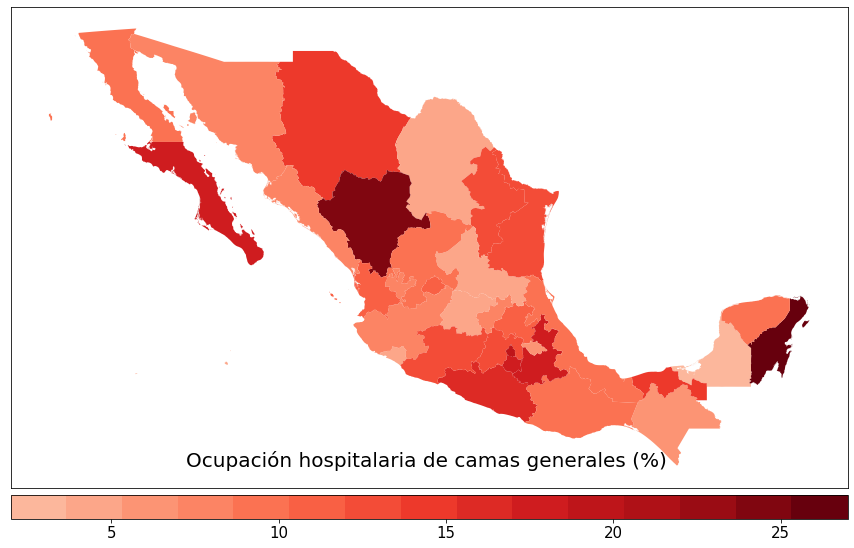

In [13]:
path3 = 'C:/Users/Emilio EG/Documents/ITAM/CIC19/datos/mapa/'

import geopandas as gpd
import matplotlib.pyplot as plt 

#Definimos el mapa (queda como geoDataFrame) y el csv que utilizaremos

shapefile = path3+'Mexico_Polygon.shp' #https://www.igismap.com/download-mexico-shapefile-free-boundary-line-polygon/
#datafile = 'data/obesity.csv'

gdf = gpd.read_file(shapefile)[['name','geometry']] #[['geometry']]
gdf.columns = ['ENTIDAD', 'geometry']
ocupacion = ocupacion2.copy().rename(index = {'México':'Mexico','Ciudad de México':'Mexico City','San Luis Potosí':'San Luis Potosi'})
ocupacion = gdf.set_index('ENTIDAD').join(ocupacion)

#----------------------------------------------------------------------------------------------------------------------

from mpl_toolkits.axes_grid1 import make_axes_locatable 
# import mapclassify 
fig, ax = plt.subplots(figsize = (15,11))
divider = make_axes_locatable(ax)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

import matplotlib as mpl
cmap = mpl.cm.Reds(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[5:,:-1])
cax = divider.append_axes('bottom', size = '5%', pad = 0.1)
cax.tick_params(labelsize=15)
ocupacion.plot(column = ocupacion.columns[-2], ax = ax, cax = cax, cmap = cmap, legend = True, legend_kwds={'orientation':'horizontal'})
plt.title('Ocupación hospitalaria de camas generales (%) \n',fontsize=20)
plt.savefig('mapa_ocupacion.png', bbox_inches='tight')
plt.show()


## Hacer el documento

In [14]:
for i in range(ocupacion2.shape[0]):
    for j in range(ocupacion2.shape[1]):
        ocupacion2.iloc[i,j] = str(ocupacion2.iloc[i,j])+' %'
ocupacion2.reset_index(inplace=True)
ocupacion2

,ESTADO,2021-04-30,2021-05-07,Diferencia
0,Aguascalientes,14.0 %,11.0 %,-3.0 %
1,Baja California,11.0 %,10.0 %,-1.0 %
2,Baja California Sur,13.0 %,18.0 %,5.0 %
3,Campeche,1.0 %,2.0 %,1.0 %
4,Coahuila,5.0 %,4.0 %,-1.0 %
5,Colima,5.0 %,5.0 %,0.0 %
6,Chiapas,5.0 %,6.0 %,1.0 %
7,Chihuahua,18.0 %,14.0 %,-4.0 %
8,Ciudad de México,18.0 %,20.0 %,2.0 %
9,Durango,16.0 %,25.0 %,9.0 %


In [15]:
reporte = 'CambiosReporte.docx'

In [16]:
document = Document()

document.add_heading('Cambios al reporte',0)

document.add_heading('Vacunación', level=2)

t = document.add_table(base_100_interes.shape[0]+1, base_100_interes.shape[1],style='LightShading-Accent1')

for j in range(base_100_interes.shape[-1]):
    t.cell(0,j).text = base_100_interes.columns[j] #
    
for i in range(base_100_interes.shape[0]):
    for j in range(base_100_interes.shape[-1]):
        t.cell(i+1,j).text = str(base_100_interes.values[i,j])

document.save(reporte)


        


C:\ProgramData\Anaconda3\lib\site-packages\docx\styles\styles.py:139: UserWarning: style lookup by style_id is deprecated. Use style name as key instead.
  return self._get_style_id_from_style(self[style_name], style_type)


In [17]:
document.add_page_break()

document.add_heading('Ocupación hospitalaria', level=2)

t = document.add_table(ocupacion2.shape[0]+1, ocupacion2.shape[1],style='LightShading-Accent1')

for j in range(ocupacion2.shape[-1]):
    t.cell(0,j).text = ocupacion2.columns[j] #
    
for i in range(ocupacion2.shape[0]):
    for j in range(ocupacion2.shape[-1]):
        t.cell(i+1,j).text = str(ocupacion2.values[i,j])
        
document.add_picture('mapa_ocupacion.png', width=Inches(6))

document.save(reporte)
